# U.S. Medical Insurance Costs
## Goal of the project
- Understand factors affecting the price of health insurance

## Project Scope
- Exploratory data analysis and Data visualization
- Understanding the relationship between insurance cost and other factors through Linear regression

### An explanation for the factors in the dataset

* **age:** age of primary beneficiary

* **sex:** insurance contractor gender, female, male

* **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
  - overweight is a BMI greater than or equal to 25
  - obesity is a BMI greater than or equal to 30.

* **children:** Number of children covered by health insurance / Number of dependents

* **smoker:** Smoking

* **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

# EDA and Data Viz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
print(sns.__version__)

0.13.2


In [3]:
df = pd.read_csv("insurance.csv")

### Overview of the data

In [4]:
df.shape

(1338, 7)

In [5]:
df.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Data quality assurance

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Great! No missing value.

### Distribution of the data

#### distribution of charges

Text(0.5, 1.0, 'Distribution of Insurance Cost')

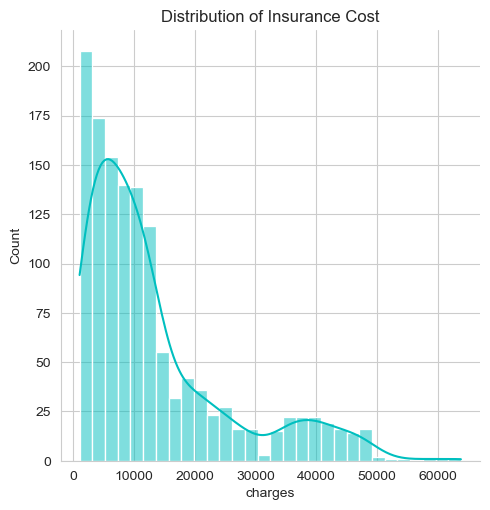

In [9]:
sns.set_style("whitegrid")
# f, ax = plt.subplots(1,1, figsize=(12, 8))
sns.displot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Insurance Cost')

The distribution is right-skewed. Use log transformation to make it look normal

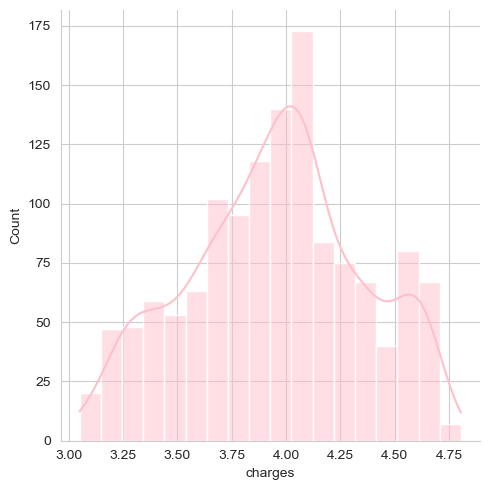

In [10]:
# f, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.displot(np.log10(df['charges']), kde = True, color = "pink")

#### Distribution of charges with respect to region

/var/folders/6x/84nwqsx53nj47_3pmxc3ws500000gn/T/ipykernel_8615/2948682656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = charges.head(), y = charges.head().index, palette='Blues')


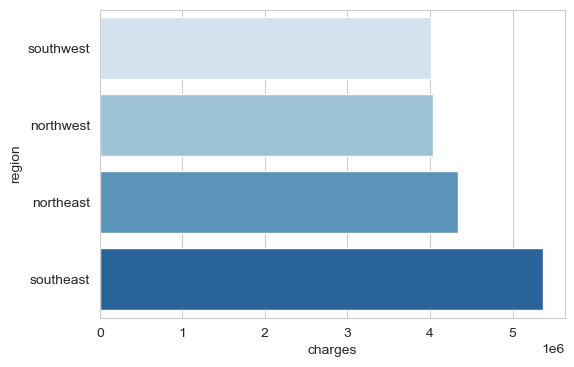

In [11]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(6, 4))
ax = sns.barplot(x = charges.head(), y = charges.head().index, palette='Blues')

In [12]:
type(charges)

pandas.core.series.Series

The medical charges are the higherst in the southeast region and lowest in the southwest region.

The following charts takes into accounts of regional differences with respect to sex 

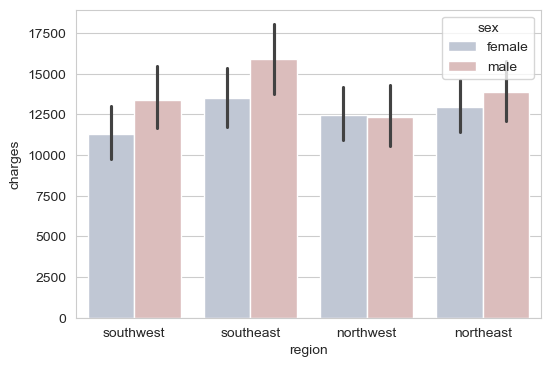

In [13]:
f, ax = plt.subplots(1, 1, figsize=(6, 4))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='vlag')

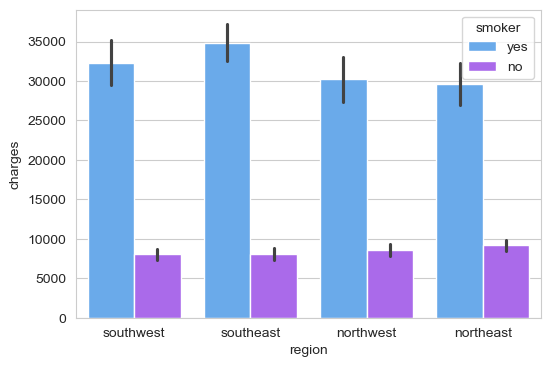

In [14]:
f, ax = plt.subplots(1,1, figsize = (6, 4))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette = 'cool')

In [15]:
# %pip install --upgrade seaborn

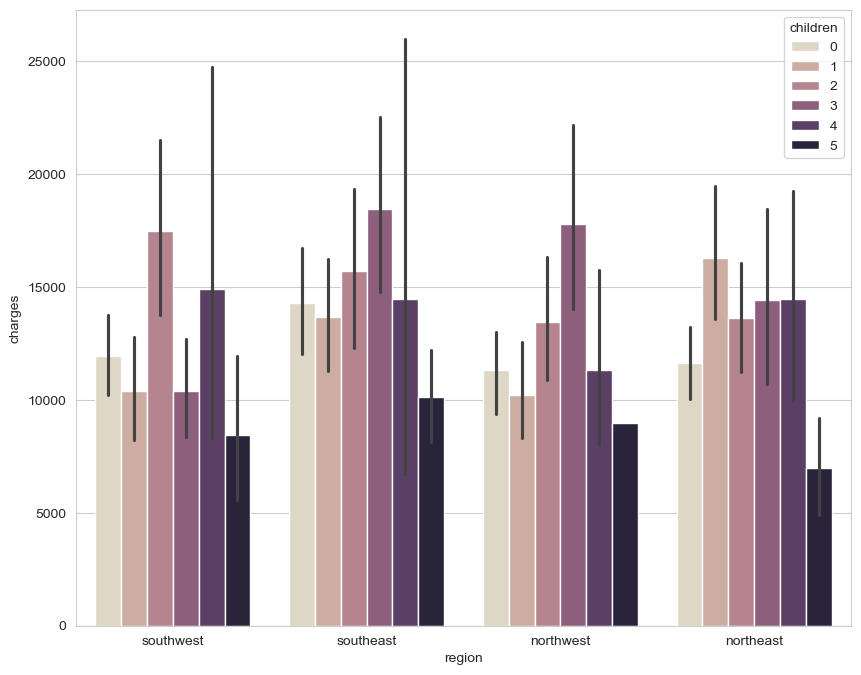

In [16]:
try:
    # Plot the data
    f, ax = plt.subplots(1, 1, figsize=(10, 8))
    sns.barplot(x='region', y='charges', hue='children', data=df, palette='ch:s=-.2,r=.6', legend='auto')

    # Show the plot
    plt.show()

except AttributeError as e:
    print("An AttributeError occurred:", e)

- In southwest and southeast region, male are more likely to pay for higher insurance costs than in northwest and northeast region.
- In all regions, the insurance charges for smokers are higher than non-smoker's insurance charges.
- In all regions, the insurance charges for people with more children tend to be higher than people with less children.

#### The insurance charge by bmi, age, children according to smoking factor:

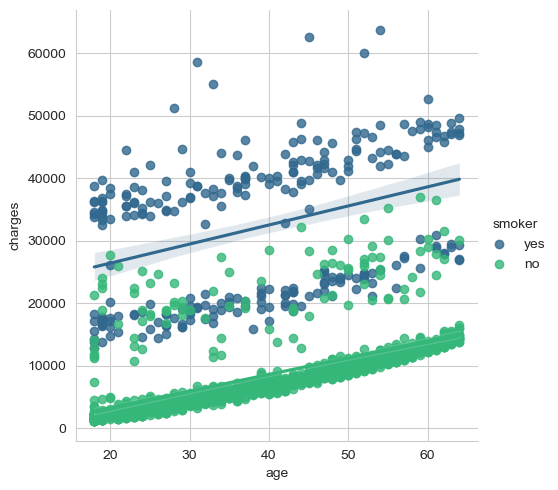

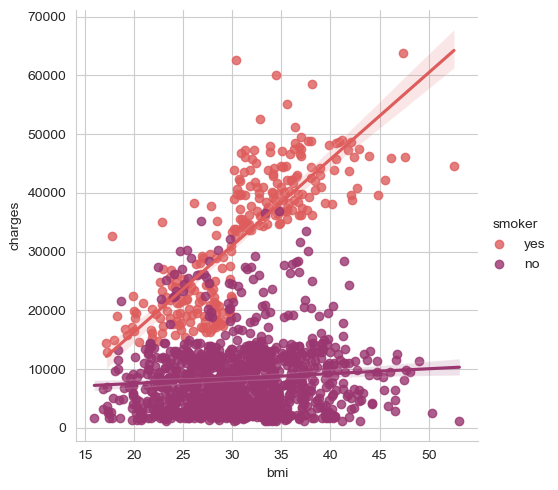

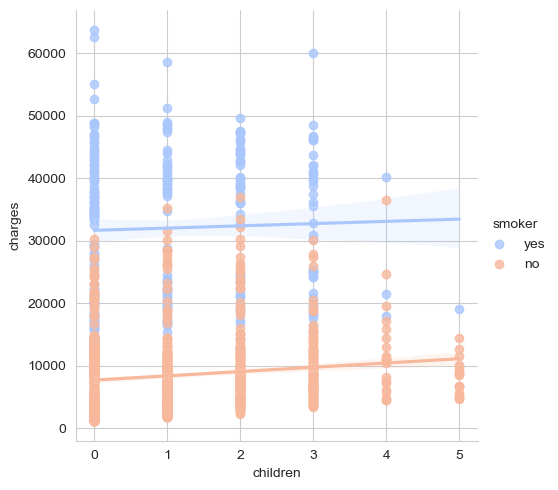

In [17]:
sns.lmplot(x = "age", y = "charges", hue = "smoker", data = df, palette  = "viridis")
sns.lmplot(x = "bmi", y = "charges", hue = "smoker", data = df, palette = "flare")
sns.lmplot(x = "children", y = "charges", hue = "smoker", data = df, palette = "coolwarm")

- Age:
    - As age increases, the insurance charges increase for both non-smokers and smokers.
    - Smokers at all ages have higher insurance costs than non-smokers.
- BMI:
    - As BMI increases, the insurance charges increase faster than non-smokers.
    - The increasing speed of insurance charges to BMI is less obvious.
- Children:
    - As the number of children increases, insurance charges slightly increase for both smokers and non-smokers.
    - The insurance charges of smokers are higher than non-smokers.
- Conclusion:
    - Smoking has the highest impact on insurance charges and increases faster, especially with BMI factors.

<Axes: xlabel='children', ylabel='charges'>

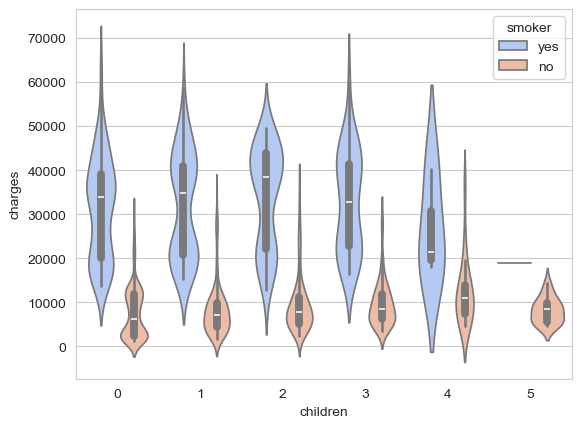

In [18]:
sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='coolwarm')

People with more children tend to smoke less.

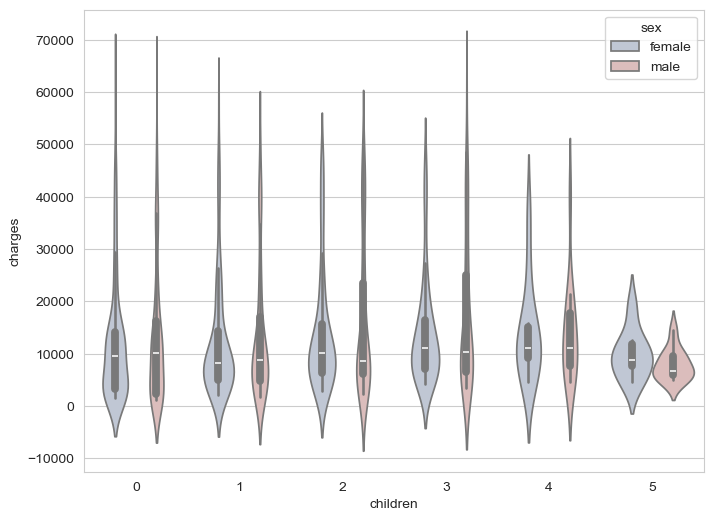

In [19]:
try:
    # Plot the data
    f, ax = plt.subplots(1, 1, figsize=(8, 6))
    sns.violinplot(x='children', y='charges', hue='sex', data=df, palette='vlag', legend='full')

    # Show the plot
    # plt.show()

except AttributeError as e:
    print("An AttributeError occurred:", e)

- The insuranc charge differences for people with different children with respect to sex.
- For people with children number 0 - 4, the insurance charge of male is higher than insurance charge for female.
- For people with children number 5, the insurance charge of female is higher than male.

#### Correlation among the factors

In [20]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The data type of sex, smoker and region before converting them into categories

In [21]:
#Converting the data type of sex, smoker and region into category type
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker','region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [28]:
type(df['sex'])

pandas.core.series.Series

In [27]:
type(df.sex)

pandas.core.series.Series

In [25]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

In [34]:
label.fit(df['smoker'].drop_duplicates())
df['smoker'] = label.transform(df['smoker'])

In [33]:
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

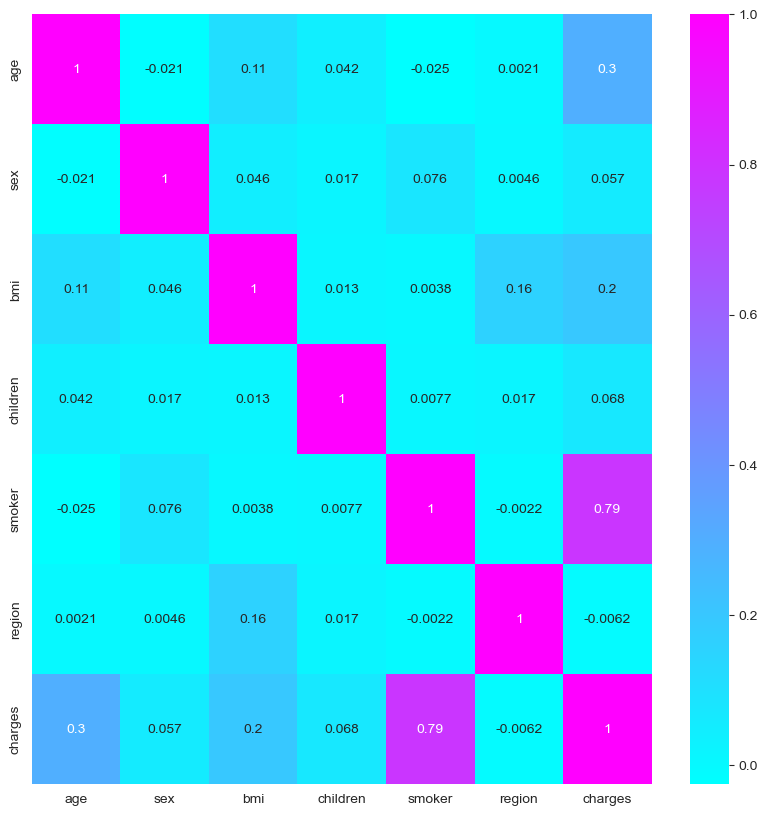

In [35]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')